In [1]:
import pandas as pd
from matplotlib import pyplot as plt

from collections import Counter

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [2]:
songs = pd.read_excel(r'2020.xlsx')

In [3]:
songs.head()

,Song Title,Artist,Feature,Tiktok,Duration (Seconds),BPM,Lyrics,Year,Lyrics_All,Language,Women/NB,Male
0,Rain on Me,Lady Gaga,Ariana Grande,NaN,182.0,123.0,I didn't ask for a free ride I only asked you ...,2020.0,[Verse 1: Lady Gaga]\nI didn't ask for a free ...,English,2.0,0.0
1,Blinding Lights,The Weeknd,NaN,NaN,202.0,171.0,Yeah I've been tryin' to call I've been on my ...,2020.0,[Intro]\nYeah\n\n[Verse 1]\nI've been tryna ca...,English,0.0,1.0
2,Savage,Megan Thee Stallion,Beyonce,Yes,242.0,169.0,"I'm that bitch (yeah) Been that bitch, still t...",2020.0,[Intro]\nI'm that bitch (Yeah)\nBeen that bitc...,English,2.0,0.0
3,Adore You,Harry Styles,NaN,NaN,207.0,99.0,Walk in your rainbow paradise (Paradise) Straw...,2020.0,Verse 1: Harry Styles]\nWalk in your rainbow p...,English,0.0,1.0
4,WAP,Cardi B,Megan Thee Stallion,NaN,207.0,133.0,"I said, certified freak Seven days a week Wet-...",2020.0,"Intro: Cardi B, Al ""T"" McLaran & Megan Thee St...",English,2.0,0.0


In [4]:
print('Number of songs: {}'.format(songs.shape[0]))

Number of songs: 104


### Looking at the duration graph

C:\Users\Sama\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Sama\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
No handles with labels found to put in legend.


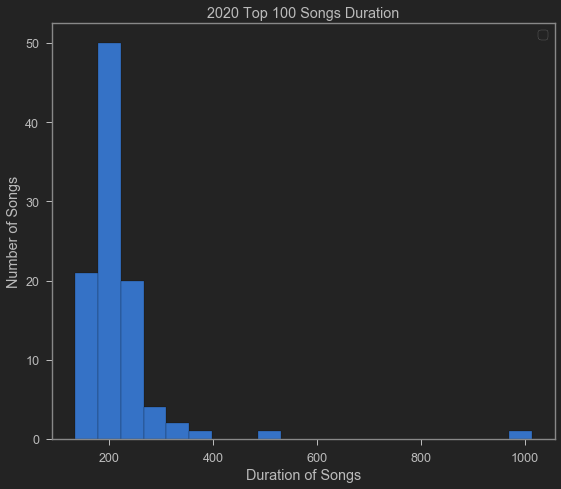

In [5]:
duration = songs['Duration (Seconds)']

color = '#fc4f30'

plt.hist(duration, bins=20, edgecolor='black')

plt.legend()

plt.title('2020 Top 100 Songs Duration')
plt.xlabel('Duration of Songs')
plt.ylabel('Number of Songs')

plt.tight_layout()

### Let us zoom in on the data (disregarding the outliers)

Median duration of songs: 205.0 seconds


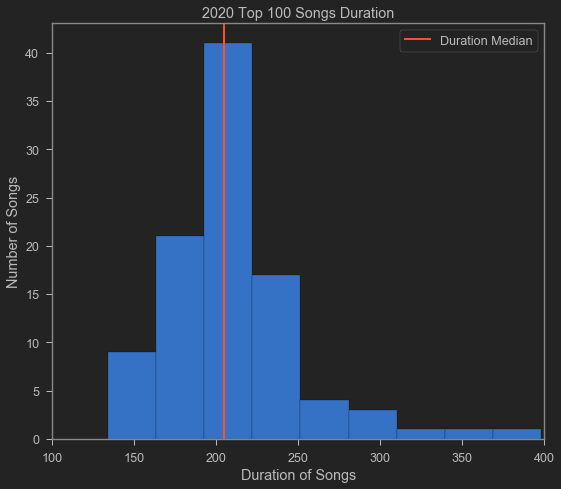

In [6]:
plt.hist(duration, bins=30, edgecolor='black')

plt.xlim(100,400)

median_duration = songs['Duration (Seconds)'].median()

plt.axvline(median_duration, color=color, label='Duration Median',linewidth=2)

plt.title('2020 Top 100 Songs Duration')
plt.xlabel('Duration of Songs')
plt.ylabel('Number of Songs')

plt.legend()

plt.tight_layout()

print('Median duration of songs: {} seconds'.format(median_duration))

### Visualizing the BPM data

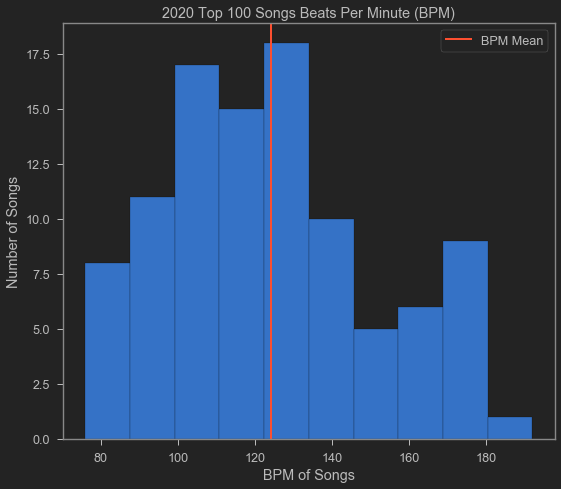

In [7]:
bpm = songs['BPM']

color2 = '#6d904f'

plt.hist(bpm, bins=10, edgecolor='black')

plt.title('2020 Top 100 Songs Beats Per Minute (BPM)')
plt.xlabel('BPM of Songs')
plt.ylabel('Number of Songs')

mean_bpm = songs['BPM'].mean()

plt.axvline(mean_bpm, color=color, label='BPM Mean',linewidth=2)

plt.legend()

plt.tight_layout()

### Female and Non-Binary artists are on the rise, lets test that on our data

Text(0, 0.5, 'Frequency')

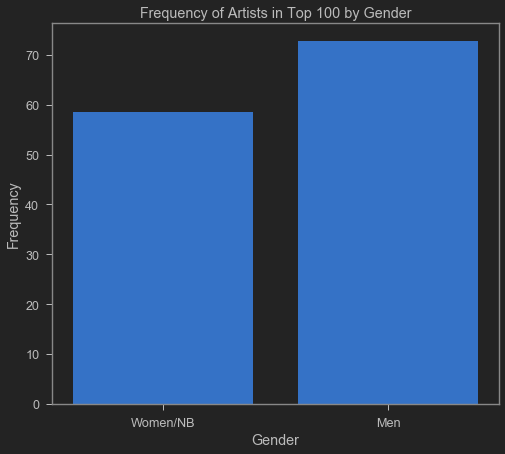

In [8]:
women_nb = songs['Women/NB'].sum()
men = songs['Male'].sum()
freq = [women_nb, men]
gender = ['Women/NB','Men']

plt.bar(gender, freq)

plt.title('Frequency of Artists in Top 100 by Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')

In [9]:
songs['num_words'] = songs['Lyrics'].str.count(' ') + 1
songs['unique_words'] = songs['num_words']
songs.head()

,Song Title,Artist,Feature,Tiktok,Duration (Seconds),BPM,Lyrics,Year,Lyrics_All,Language,Women/NB,Male,num_words,unique_words
0,Rain on Me,Lady Gaga,Ariana Grande,NaN,182.0,123.0,I didn't ask for a free ride I only asked you ...,2020.0,[Verse 1: Lady Gaga]\nI didn't ask for a free ...,English,2.0,0.0,319.0,319.0
1,Blinding Lights,The Weeknd,NaN,NaN,202.0,171.0,Yeah I've been tryin' to call I've been on my ...,2020.0,[Intro]\nYeah\n\n[Verse 1]\nI've been tryna ca...,English,0.0,1.0,261.0,261.0
2,Savage,Megan Thee Stallion,Beyonce,Yes,242.0,169.0,"I'm that bitch (yeah) Been that bitch, still t...",2020.0,[Intro]\nI'm that bitch (Yeah)\nBeen that bitc...,English,2.0,0.0,412.0,412.0
3,Adore You,Harry Styles,NaN,NaN,207.0,99.0,Walk in your rainbow paradise (Paradise) Straw...,2020.0,Verse 1: Harry Styles]\nWalk in your rainbow p...,English,0.0,1.0,340.0,340.0
4,WAP,Cardi B,Megan Thee Stallion,NaN,207.0,133.0,"I said, certified freak Seven days a week Wet-...",2020.0,"Intro: Cardi B, Al ""T"" McLaran & Megan Thee St...",English,2.0,0.0,648.0,648.0


In [10]:
words = songs['Lyrics'].str.lower().str.split()
i = 0
for word in words:
    print(len(set(word)))
    songs['unique_words'][i] = len(set(word))
    i += 1

95
107
200
74
287
150
144
201
256
113
134
104
198
106
408
130
120
174
156
130
110
133
133
145
117
283
91
88
72
127
93
117
91
153
112
283
88
303
165
57
179
209
184
127
217
94
119
106
103
95
133
125
123
99
240
87
99
137
76
81
144
87
174
112
135
300
132
107
99
143
85
75
185
173
139
673
144
131
118
277
77
162
114
109
159
253
115
3
112
168
79
202
146
184
97
206
163
16
135
189


C:\Users\Sama\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


TypeError: 'float' object is not iterable

In [11]:
songs.head(10)

,Song Title,Artist,Feature,Tiktok,Duration (Seconds),BPM,Lyrics,Year,Lyrics_All,Language,Women/NB,Male,num_words,unique_words
0,Rain on Me,Lady Gaga,Ariana Grande,NaN,182.0,123.0,I didn't ask for a free ride I only asked you ...,2020.0,[Verse 1: Lady Gaga]\nI didn't ask for a free ...,English,2.0,0.0,319.0,95.0
1,Blinding Lights,The Weeknd,NaN,NaN,202.0,171.0,Yeah I've been tryin' to call I've been on my ...,2020.0,[Intro]\nYeah\n\n[Verse 1]\nI've been tryna ca...,English,0.0,1.0,261.0,107.0
2,Savage,Megan Thee Stallion,Beyonce,Yes,242.0,169.0,"I'm that bitch (yeah) Been that bitch, still t...",2020.0,[Intro]\nI'm that bitch (Yeah)\nBeen that bitc...,English,2.0,0.0,412.0,200.0
3,Adore You,Harry Styles,NaN,NaN,207.0,99.0,Walk in your rainbow paradise (Paradise) Straw...,2020.0,Verse 1: Harry Styles]\nWalk in your rainbow p...,English,0.0,1.0,340.0,74.0
4,WAP,Cardi B,Megan Thee Stallion,NaN,207.0,133.0,"I said, certified freak Seven days a week Wet-...",2020.0,"Intro: Cardi B, Al ""T"" McLaran & Megan Thee St...",English,2.0,0.0,648.0,287.0
5,Say So,Doja Cat,NaN,Yes,238.0,111.0,"Day to night to morning, keep with me in the m...",2020.0,"Chorus]\nDay to night to morning, keep with me...",English,1.0,0.0,463.0,150.0
6,Dynamite,BTS,NaN,NaN,199.0,114.0,'Cause I-I-I'm in the stars tonight So watch m...,2020.0,"Intro: Jungkook]\n'Cause I, I, I'm in the star...",English,0.0,1.0,471.0,144.0
7,Mood,24kGoldn,Iann Dior,NaN,140.0,91.0,"Woah JB, JB Why you always in a mood? Fuckin' ...",2020.0,"[Intro: 24kGoldn]\nOh-oh-oh\nYeah, yeah, yeah,...",English,0.0,2.0,590.0,201.0
8,Rockstar,DaBaby,Roddy Ricch,NaN,181.0,90.0,"Woo, woo I pull up like How you pull up, Baby?...",2020.0,[Verse 1]\nI’m through with standing in line t...,English,0.0,2.0,657.0,256.0
9,Break My Heart,Dua Lipa,NaN,NaN,221.0,113.0,I've always been the one to say the first good...,2020.0,[Verse 1]\nI\'ve always been the one to say th...,English,1.0,0.0,500.0,113.0


In [12]:
songs = songs[songs.Language == 'English']

In [13]:
stop_words = list(stopwords.words('english'))
stop_words.extend(("im",'know','me','you','go',"aint",'i','the','your'))

In [14]:
songs['Lyrics'] = songs['Lyrics'].str.replace('  ',' ')
songs['Lyrics'] = songs['Lyrics'].str.lower()
songs['Lyrics (No Punc)'] = songs['Lyrics'].str.replace('[^\w\s]','')

In [15]:
text_lower = ' '.join(songs['Lyrics (No Punc)']).lower().split()

In [16]:
ps = PorterStemmer()

In [17]:
text = [word for word in text_lower if not word in stop_words]
# text = [ps.stem(word) for word in text]
most_frequent = Counter(text).most_common(15)

In [18]:
words = []
freq = []

for word in most_frequent:
    words.append(word[0])
    freq.append(word[1])

<BarContainer object of 15 artists>

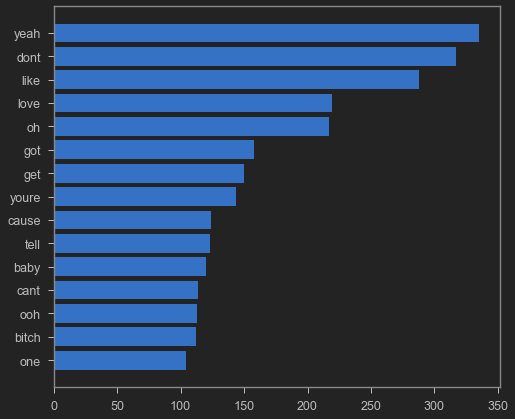

In [19]:
words.reverse()
freq.reverse()
plt.barh(words,freq)